# The Future of Urban Mobility AI: Can Foundation Models Outperform Classic ML & DL Models For Crowd Prediction?

## Original Paper: Zhang et al. (2017) "Deep Spatio-Temporal Residual Networks for Citywide Crowd Flows Prediction" (Microsoft Research)

Zhang, J., Zheng, Y., & Qi, D. (2017). Deep Spatio-Temporal Residual Networks for Citywide Crowd Flows Prediction. Proceedings of the AAAI Conference on Artificial Intelligence, 31(1). https://doi.org/10.1609/aaai.v31i1.10735 

Home page: https://www.microsoft.com/en-us/research/publication/deep-spatio-temporal-residual-networks-for-citywide-crowd-flows-prediction/

Preprint: https://arxiv.org/pdf/1610.00081 

### Goal


The goal is to predict one step ahead

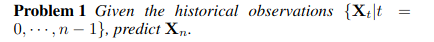

### Datasets

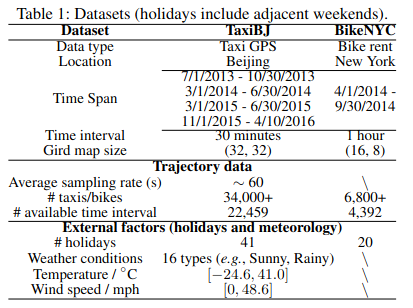

* TaxiBJ: the last four weeks as the testing data, and all data before that as training data.
* [BikeNYC](https://1drv.ms/f/s!Akh6N7xv3uVmhOhCtwaiDRy5oDVIug): the last 10 days are chosen as testing data, and the others as training data.

### Results

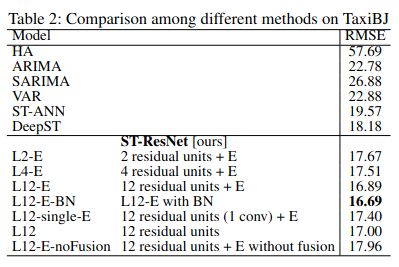
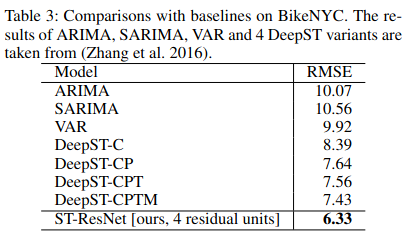


### Code

The original repo (referenced on the homepage) does not exist anymore: https://github.com/lucktroy/DeepST/tree/master/scripts/papers/AAAI17

Therefore, I forked: https://github.com/topazape/ST-ResNet as a starting point.

## BikeNYC Experiment

In [1]:
# [dataset]
data_files = ["./datasets/BikeNYC/NYC14_M16x8_T60_NewEnd.h5"]
holiday_file = ""
meteorol_file = ""
T = 24  # time step of one hour
len_closeness = 3
len_period = 1
len_trend = 1
period_interval = 1
trend_interval = 7
len_test = 672
use_meta = True

# [model]
nb_flow = 2
map_height = 8
map_width = 16
nb_residual_unit = 4

# [learning]
epochs = 50
batch_size = 32
learning_rate = 0.0002


In [2]:
import tables
import numpy as np

In [3]:
def remove_incomplete_days(dat: tables.file.File, T: int) -> tuple[np.ndarray, np.ndarray]:
    # 20140425 has 24 timestamps, which does not appear in `incomplete_days` in the original implementation.
    # So I reimplemented it in a different way.
    data = dat.root.data.read()
    timestamps = dat.root.date.read().astype(str)

    dates, values = np.vstack(
        np.frompyfunc(lambda x: (x[:8], x[8:]), 1, 2)(timestamps)
    )
    # label encoding
    uniq_dates, labels = np.unique(dates, return_inverse=True)
    # groupby("labels")["values"].sum() != sum(range(1, 49))
    incomplete_days = uniq_dates[
        np.where(np.bincount(labels, values.astype(int)) != sum(range(1, (T + 1))))[
            0
        ]
    ]
    del_idx = np.where(np.isin(dates, incomplete_days))[0]
    new_data = np.delete(data, del_idx, axis=0)
    new_timestamps = np.delete(timestamps, del_idx)
    return new_data, new_timestamps

In [4]:
dat=tables.open_file(data_files[0],mode="r")
data=dat.root.data.read()
data

array([[[[ 0.,  0.,  1., ...,  0.,  0.,  0.],
         [ 0.,  1.,  1., ...,  1.,  0.,  0.],
         [ 0.,  0.,  2., ...,  2.,  2.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  3.,  1.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  1.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  1.,  0.,  0.],
         [ 0.,  0.,  0., ...,  1.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  1.,  0.],
         [ 0.,  0.,  0., ...,  2.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  1.,  2.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  1.,  0.,  1.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  1., ..., 

In [5]:
datasets = remove_incomplete_days(dat,T)
datasets

(array([[[[ 0.,  0.,  1., ...,  0.,  0.,  0.],
          [ 0.,  1.,  1., ...,  1.,  0.,  0.],
          [ 0.,  0.,  2., ...,  2.,  2.,  0.],
          ...,
          [ 0.,  0.,  0., ...,  3.,  1.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  1.]],
 
         [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  1.,  0.,  0.],
          [ 0.,  0.,  0., ...,  1.,  0.,  0.],
          ...,
          [ 0.,  0.,  0., ...,  0.,  1.,  0.],
          [ 0.,  0.,  0., ...,  2.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],
 
 
        [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          ...,
          [ 0.,  0.,  0., ...,  0.,  1.,  2.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  1.,  0.,  1.]],
 
         [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
   

In [6]:
datasets[1]

array(['2014040101', '2014040102', '2014040103', ..., '2014093022',
       '2014093023', '2014093024'], shape=(4392,), dtype='<U10')

In [7]:
def extract_timeseries(data: np.ndarray, row: int, col: int, channel: int = 0) -> np.ndarray:
    """
    Extracts the time series of a specific grid location from a 4D numpy array.
    
    Parameters:
        data (np.ndarray): A 4D numpy array with shape (time_steps, channels, height, width)
        row (int): The row index of the desired grid location
        col (int): The column index of the desired grid location
        channel (int): The channel index to extract from (default: 0)
        
    Returns:
        np.ndarray: A 1D array representing the time series at the specified location
    """
    if data.ndim != 4:
        raise ValueError("Input data must be a 4D numpy array (time_steps, channels, height, width)")
    
    if not (0 <= row < data.shape[2]) or not (0 <= col < data.shape[3]):
        raise ValueError("Row or column index out of bounds")
    
    if not (0 <= channel < data.shape[1]):
        raise ValueError("Channel index out of bounds")
    
    return data[:, channel, row, col]

grid_data = datasets[0]

ROW=3
COL=5

# Extract time series from row 5, column 3 in channel 0
time_series = extract_timeseries(grid_data, row=ROW, col=COL, channel=0)

print(time_series)


[0. 1. 0. ... 2. 4. 1.]


In [8]:
len(time_series)

4392

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta


In [10]:

def adjust_timestamps(timestamps):
    """
    Adjusts the given timestamps by subtracting 1 hour from each entry.
    
    Parameters:
        timestamps (numpy array): Array of timestamps in 'YYYYMMDDHH' format.
        
    Returns:
        numpy array: Adjusted timestamps.
    """
    adjusted = []
    for ts in timestamps:
        # Fix invalid '24' hour case
        if ts[-2:] == '24':
            ts = (datetime.strptime(ts[:8], "%Y%m%d") + timedelta(days=1)).strftime("%Y%m%d") + "00"
        dt = datetime.strptime(ts, "%Y%m%d%H") - timedelta(hours=1)
        adjusted.append(dt.strftime("%Y%m%d%H"))
    
    return np.array(adjusted, dtype='<U10')

# Example usage
timestamps = datasets[1]
timestamps = adjust_timestamps(timestamps)
timestamps

array(['2014040100', '2014040101', '2014040102', ..., '2014093021',
       '2014093022', '2014093023'], shape=(4392,), dtype='<U10')

In [11]:
def format_timestamp(timestamp: str) -> str:
    """
    Converts timestamp from 'YYYYMMDDHH' to 'YYYY-MM-DD HH:00'.
    """
    dt = datetime.strptime(timestamp, "%Y%m%d%H")
    return dt.strftime("%Y-%m-%d %H:00")

def create_dataframe(timeseries: np.ndarray, timestamps: np.ndarray) -> pd.DataFrame:
    if timeseries.shape[0] != timestamps.shape[0]:
        raise ValueError("Time series and timestamps must have the same length")

    formatted_timestamps = [format_timestamp(ts) for ts in timestamps]

    df = pd.DataFrame({
        'timestamp': formatted_timestamps,
        'value': timeseries
    })
    return df


df = create_dataframe(time_series, timestamps)
print(df)

             timestamp  value
0     2014-04-01 00:00    0.0
1     2014-04-01 01:00    1.0
2     2014-04-01 02:00    0.0
3     2014-04-01 03:00    0.0
4     2014-04-01 04:00    1.0
...                ...    ...
4387  2014-09-30 19:00   16.0
4388  2014-09-30 20:00   10.0
4389  2014-09-30 21:00    2.0
4390  2014-09-30 22:00    4.0
4391  2014-09-30 23:00    1.0

[4392 rows x 2 columns]


Get the last 10 days for validation, like in the paper (+5 as input):

In [12]:
train_data_df = df[df['timestamp']<'2014-09-21 00:00']

In [13]:
test_data_df = df.copy()

In [14]:
df = df[df['timestamp']>='2014-09-16 00:00']

### TimeGPT

In [15]:
from nixtla import NixtlaClient

In [ ]:
nixtla_client = NixtlaClient(
    api_key = "nixak-"
)

In [18]:
nixtla_client.validate_api_key()

INFO:nixtla.nixtla_client:Happy Forecasting! :)


True

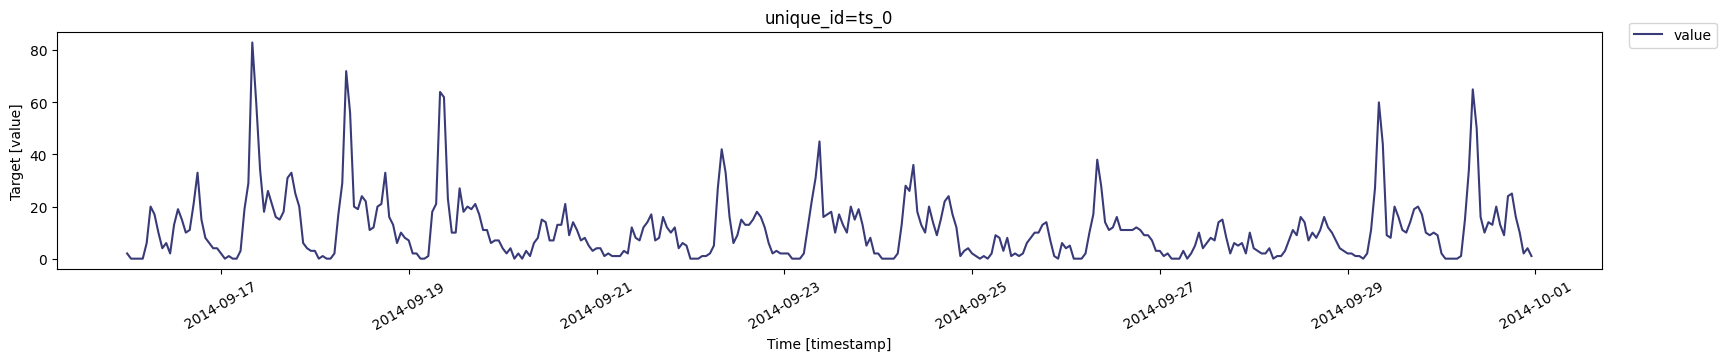

In [19]:
nixtla_client.plot(df, time_col='timestamp', target_col='value')

#### Experiment v0
##### Simple forecast

In [123]:
timegpt_fcst_df = nixtla_client.forecast(df=df, h=24, freq='h', time_col='timestamp', target_col='value')
timegpt_fcst_df

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,timestamp,TimeGPT
0,2014-10-01 00:00:00,-1.202475
1,2014-10-01 01:00:00,-0.848185
2,2014-10-01 02:00:00,-0.593907
3,2014-10-01 03:00:00,-1.358113
4,2014-10-01 04:00:00,-2.240385
5,2014-10-01 05:00:00,-1.024400
6,2014-10-01 06:00:00,9.498710
7,2014-10-01 07:00:00,28.237295
8,2014-10-01 08:00:00,53.401657
9,2014-10-01 09:00:00,40.392822


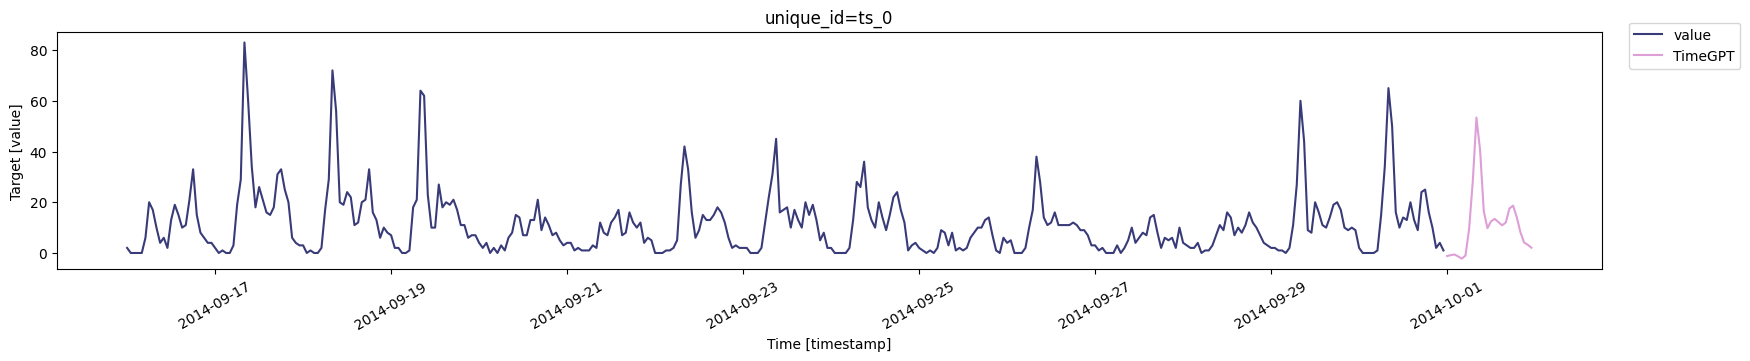

In [124]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='timestamp', target_col='value')

##### Historical forecast

In [ ]:
timegpt_fcst_with_history_df = nixtla_client.forecast(
    df=df, h=1, time_col='timestamp', target_col='value', freq='h',
    add_history=True,
)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...


In [31]:
timegpt_fcst_with_history_df.to_csv(f'predictions/timegpt/fcst_{ROW}_{COL}_h{HORIZON}.csv')

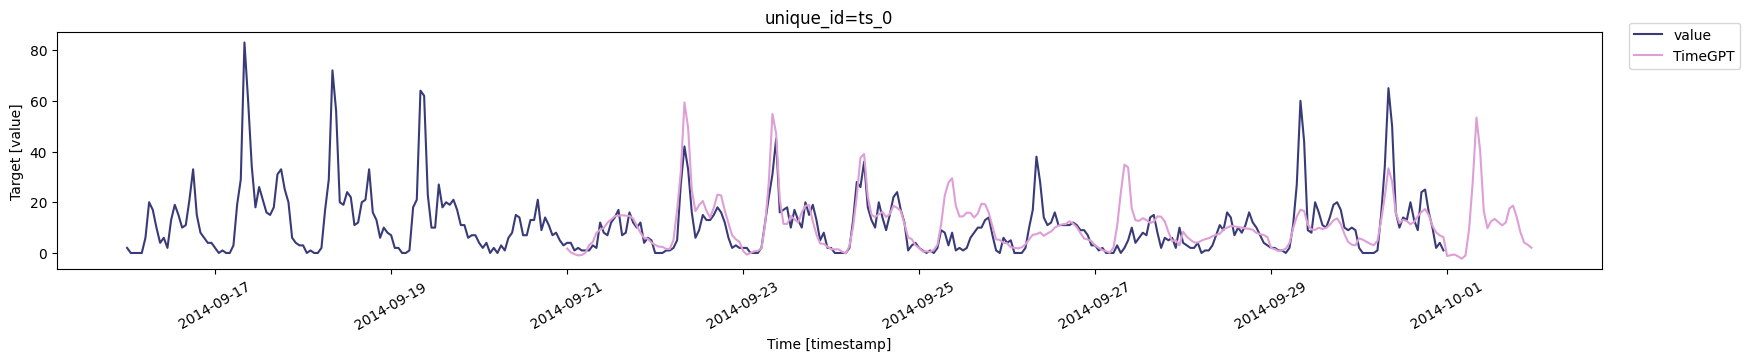

In [32]:
nixtla_client.plot(df, timegpt_fcst_with_history_df, time_col='timestamp', target_col='value')


In [29]:
def compute_rmse(original_df, forecast_df):
    # Convert timestamp to datetime
    original_df['timestamp'] = pd.to_datetime(original_df['timestamp'])
    forecast_df['timestamp'] = pd.to_datetime(forecast_df['timestamp'])

    # Merge the DataFrames based on the timestamp
    merged_df = pd.merge(original_df, forecast_df, on='timestamp', how='inner')
    print(merged_df)

    # Calculate the squared differences
    merged_df['squared_diff'] = (merged_df['value'] - merged_df['TimeGPT'])**2

    # Calculate RMSE
    rmse = np.sqrt(merged_df['squared_diff'].mean())
    return rmse



In [ ]:
rmse = compute_rmse(df,timegpt_fcst_with_history_df)
print(f"RMSE: {rmse}")


##### Run forecasts for all grid cells and store results

In [94]:
import os.path

def prediction_exists(row, col):
    return os.path.isfile(f'predictions/timegpt/fcst_{row}_{col}.csv')

prediction_exists(2,1)

False

In [97]:
def load_prediction(row,col):
    timegpt_fcst_with_history_df = pd.read_csv(f'predictions/timegpt/fcst_{row}_{col}.csv')
    return timegpt_fcst_with_history_df

load_prediction(1,3)

,timestamp,TimeGPT
0,2014-09-21 00:00:00,16.648037
1,2014-09-21 01:00:00,10.752392
2,2014-09-21 02:00:00,6.054309
3,2014-09-21 03:00:00,2.488530
4,2014-09-21 04:00:00,1.055259
...,...,...
236,2014-09-30 20:00:00,28.864220
237,2014-09-30 21:00:00,26.119790
238,2014-09-30 22:00:00,21.338356
239,2014-09-30 23:00:00,13.381630


In [105]:
def compute_cell_rmse(row, col):
    time_series = extract_timeseries(grid_data, row=row, col=col, channel=0)
    timestamps = datasets[1]
    timestamps = adjust_timestamps(timestamps)
    df = create_dataframe(time_series, timestamps)
    df = df[df['timestamp']>='2014-09-16 00:00']

    if prediction_exists(row, col):
        print('Loading predictions ...')
        timegpt_fcst_with_history_df = load_prediction(row, col)
    else:
        print('Computing predicitons ...')
        timegpt_fcst_with_history_df = nixtla_client.forecast(
            df=df, h=1, time_col='timestamp', target_col='value', freq='h',
            add_history=True,
        )
        timegpt_fcst_with_history_df.to_csv(f'predictions/timegpt/fcst_{row}_{col}.csv', index=False)
    rmse = compute_rmse(df, timegpt_fcst_with_history_df)
    print(f"[{row},{col}] RMSE:{rmse}")
    return rmse

rmses =  []

for row in range(0,16):
    for col in range(0,8):
        rmses.append(compute_cell_rmse(row,col))

print(rmses)



Loading predictions ...
[0,0] RMSE:0.002570502930800306
Loading predictions ...
[0,1] RMSE:0.002570502930800306
Loading predictions ...
[0,2] RMSE:3.5633947837540783
Loading predictions ...
[0,3] RMSE:10.037934923310697
Loading predictions ...
[0,4] RMSE:15.239814706642761
Loading predictions ...
[0,5] RMSE:0.002570502930800306


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Loading predictions ...
[0,6] RMSE:0.002570502930800306
Loading predictions ...
[0,7] RMSE:0.002570502930800306
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[1,0] RMSE:0.002570502930800306
Loading predictions ...
[1,1] RMSE:6.072188987583208
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[1,2] RMSE:6.10467960056596
Loading predictions ...
[1,3] RMSE:10.603164877491775
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[1,4] RMSE:13.917665751860108
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[1,5] RMSE:11.204286010693234
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[1,6] RMSE:2.810509161338358
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[1,7] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[2,0] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[2,1] RMSE:3.094132360384688
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[2,2] RMSE:8.124441799259046
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[2,3] RMSE:14.124176681319927
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[2,4] RMSE:9.87947194144156
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[2,5] RMSE:19.116945715244864
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[2,6] RMSE:4.0930457339758926
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[2,7] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[3,0] RMSE:0.002570502930800306
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[3,1] RMSE:9.823857990415844
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[3,2] RMSE:13.609803980126207
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[3,3] RMSE:19.39126985581633
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[3,4] RMSE:24.82940198763119
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[3,5] RMSE:8.01946406849938
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[3,6] RMSE:0.002570502930800306
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[3,7] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[4,0] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[4,1] RMSE:15.353709343653744
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[4,2] RMSE:13.703235791015969
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[4,3] RMSE:13.525093211179996
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[4,4] RMSE:9.825678636444476
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[4,5] RMSE:7.809890565314297
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[4,6] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[4,7] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[5,0] RMSE:0.002570502930800306
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[5,1] RMSE:18.817138848097564
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[5,2] RMSE:17.183880967133586
Loading predictions ...
[5,3] RMSE:19.97543575145462
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[5,4] RMSE:14.245502307836027
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[5,5] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[5,6] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[5,7] RMSE:0.002570502930800306
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[6,0] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[6,1] RMSE:16.935044642220817
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[6,2] RMSE:18.79578174157705
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[6,3] RMSE:20.080684570699418
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[6,4] RMSE:11.641629805276798
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[6,5] RMSE:0.002570502930800306
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[6,6] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[6,7] RMSE:0.002570502930800306
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[7,0] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[7,1] RMSE:13.642025157738148
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[7,2] RMSE:17.016431550912763
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[7,3] RMSE:21.37184891958808
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[7,4] RMSE:8.20325748668239
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[7,5] RMSE:0.002570502930800306
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[7,6] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[7,7] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[8,0] RMSE:6.403986488399714
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[8,1] RMSE:11.873086183839364
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[8,2] RMSE:12.35191115935829
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[8,3] RMSE:15.479802706277466
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[8,4] RMSE:8.601080918207966
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[8,5] RMSE:1.547153580097292
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[8,6] RMSE:0.002570502930800306
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[8,7] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[9,0] RMSE:24.094423827936296
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[9,1] RMSE:8.012939328699487
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[9,2] RMSE:8.77825577110615
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[9,3] RMSE:7.686780244079536
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[9,4] RMSE:5.639365513049377
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[9,5] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[9,6] RMSE:4.854884546519325
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[9,7] RMSE:0.002570502930800306
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[10,0] RMSE:14.313091700592
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[10,1] RMSE:9.821399516794514
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[10,2] RMSE:6.817657614659597
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[10,3] RMSE:5.287142657538004
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[10,4] RMSE:3.880122899223147
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[10,5] RMSE:0.002570502930800306
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[10,6] RMSE:5.188028338714668
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[10,7] RMSE:2.1259317656706505
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[11,0] RMSE:13.488011454485571
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[11,1] RMSE:12.72174381434626
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[11,2] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[11,3] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[11,4] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[11,5] RMSE:1.6790453164840837
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[11,6] RMSE:0.9429252848834933
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[11,7] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[12,0] RMSE:7.752473567223986
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[12,1] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[12,2] RMSE:5.74673617862669
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[12,3] RMSE:9.750837264686353
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[12,4] RMSE:2.5531225667590034
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[12,5] RMSE:1.8957608947336775
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[12,6] RMSE:0.002570502930800306
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[12,7] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[13,0] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[13,1] RMSE:0.002570502930800306
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[13,2] RMSE:2.9458867986620376
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[13,3] RMSE:7.710715412667907
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[13,4] RMSE:1.6876675342706142
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[13,5] RMSE:3.9700305727035357
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[13,6] RMSE:1.8811816927461884
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[13,7] RMSE:1.4560359282046909
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[14,0] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[14,1] RMSE:0.002570502930800306
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[14,2] RMSE:3.0911829947417
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[14,3] RMSE:4.0605317926657
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[14,4] RMSE:4.7903847224501765
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[14,5] RMSE:3.0232607390711816
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[14,6] RMSE:2.015987717342668
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[14,7] RMSE:0.9634530333874449
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[15,0] RMSE:0.002570502930800306
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[15,1] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[15,2] RMSE:0.0025654494710700606
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[15,3] RMSE:0.002570502930800306
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[15,4] RMSE:4.263672605310704
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[15,5] RMSE:1.470171475186865
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


[15,6] RMSE:2.2082179371533774
Computing predicitons ...


INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...


[15,7] RMSE:2.0426881318865613
[np.float64(0.002570502930800306), np.float64(0.002570502930800306), np.float64(3.5633947837540783), np.float64(10.037934923310697), np.float64(15.239814706642761), np.float64(0.002570502930800306), np.float64(0.002570502930800306), np.float64(0.002570502930800306), np.float64(0.002570502930800306), np.float64(6.072188987583208), np.float64(6.10467960056596), np.float64(10.603164877491775), np.float64(13.917665751860108), np.float64(11.204286010693234), np.float64(2.810509161338358), np.float64(0.0025654494710700606), np.float64(0.0025654494710700606), np.float64(3.094132360384688), np.float64(8.124441799259046), np.float64(14.124176681319927), np.float64(9.87947194144156), np.float64(19.116945715244864), np.float64(4.0930457339758926), np.float64(0.0025654494710700606), np.float64(0.002570502930800306), np.float64(9.823857990415844), np.float64(13.609803980126207), np.float64(19.39126985581633), np.float64(24.82940198763119), np.float64(8.01946406849938)

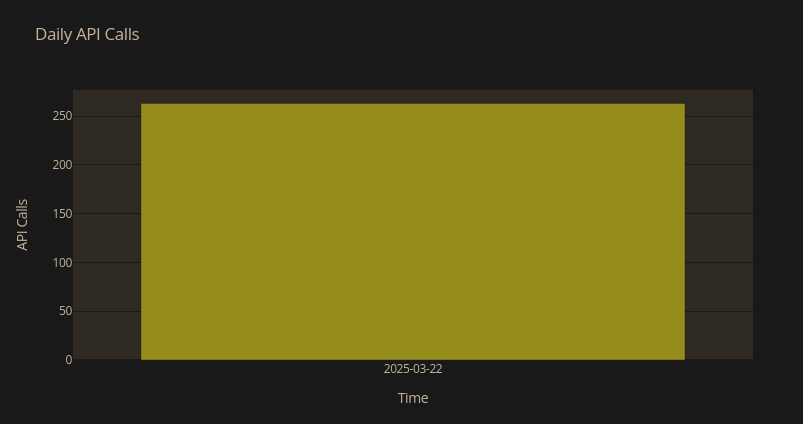

In [109]:
np.mean(rmses)

np.float64(5.7716825988548335)

Better than ST-ResNet? 

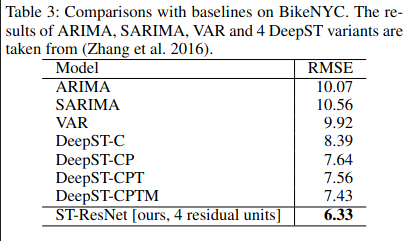

##### Identified issues

https://docs.nixtla.io/docs/tutorials-historical_forecast

> When add_history is set to True, the output DataFrame will include not only the future forecasts determined by the h argument, but also the historical predictions. Currently, **the historical forecasts are not affected by h**, and have a fix horizon depending on the frequency of the data. The historical forecasts are produced in a rolling window fashion, and concatenated. This means that the model is applied sequentially at each time step using only the most recent information available up to that point.



#### Experiment v1

##### Multiple cells at once

In [20]:
def get_df(row, col, i=0, channel=0):
    time_series = extract_timeseries(grid_data, row=row, col=col, channel=channel)
    timestamps = datasets[1]
    timestamps = adjust_timestamps(timestamps)
    df = create_dataframe(time_series, timestamps)
    df['unique_id'] = i
    return df

In [21]:
dfs = []
i=0

for channel in [0,1]:
    for row, col in [(3,5),(4,5)]:
        dfs.append(get_df(row,col,i,channel))
        i+=1

df = pd.concat(dfs, axis=0)
df

,timestamp,value,unique_id
0,2014-04-01 00:00,0.0,0
1,2014-04-01 01:00,1.0,0
2,2014-04-01 02:00,0.0,0
3,2014-04-01 03:00,0.0,0
4,2014-04-01 04:00,1.0,0
...,...,...,...
4387,2014-09-30 19:00,29.0,3
4388,2014-09-30 20:00,8.0,3
4389,2014-09-30 21:00,6.0,3
4390,2014-09-30 22:00,7.0,3


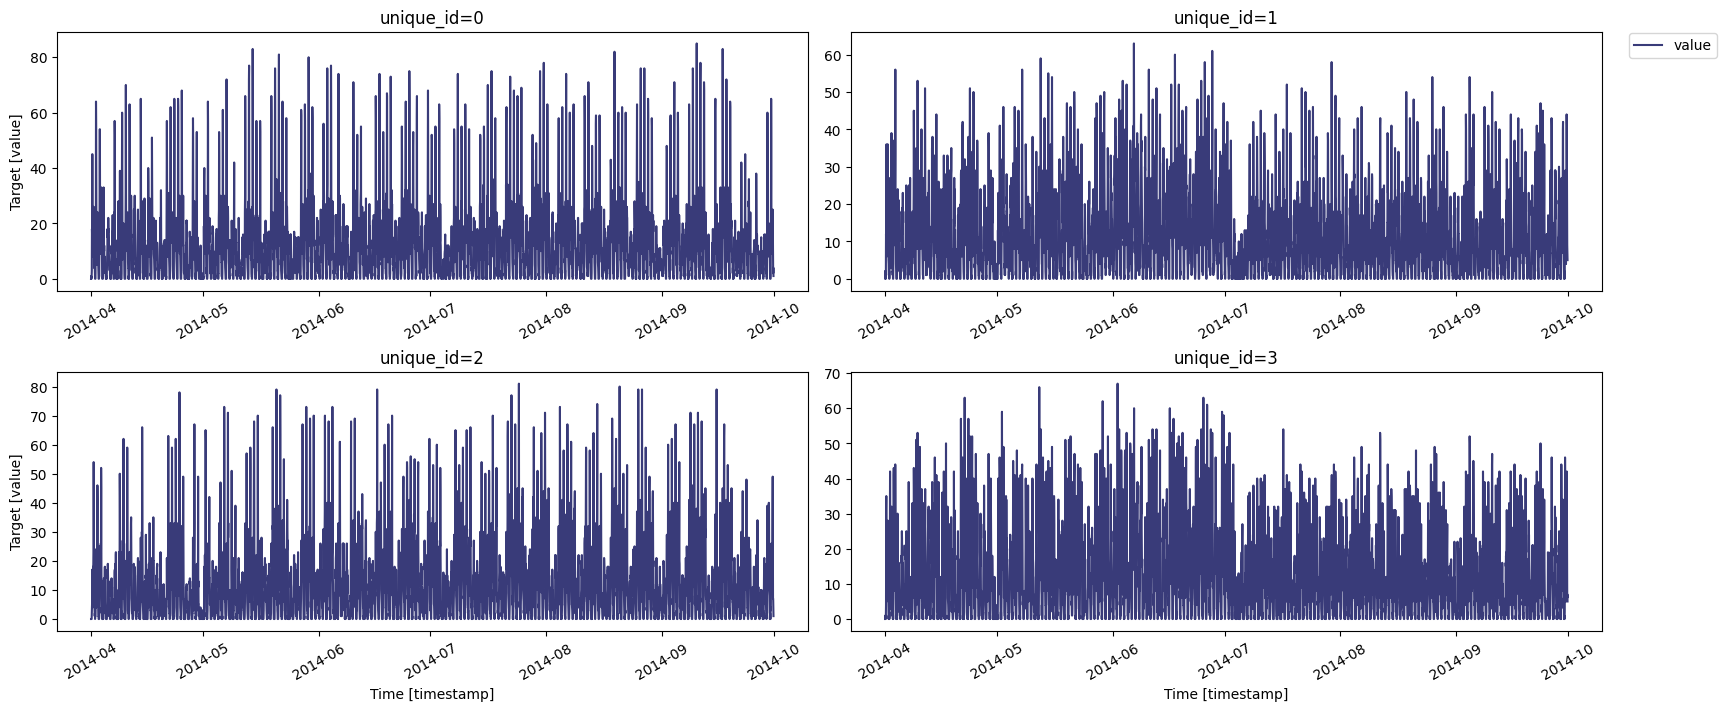

In [22]:
nixtla_client.plot(df, time_col='timestamp', target_col='value')

In [23]:
timegpt_fcst_df = nixtla_client.forecast(df=df, h=24, freq='h', time_col='timestamp', target_col='value')
timegpt_fcst_df

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,unique_id,timestamp,TimeGPT
0,0,2014-10-01 00:00:00,-1.202614
1,0,2014-10-01 01:00:00,-0.847775
2,0,2014-10-01 02:00:00,-0.594713
3,0,2014-10-01 03:00:00,-1.358931
4,0,2014-10-01 04:00:00,-2.239870
...,...,...,...
91,3,2014-10-01 19:00:00,25.792120
92,3,2014-10-01 20:00:00,12.507367
93,3,2014-10-01 21:00:00,8.102301
94,3,2014-10-01 22:00:00,6.962522


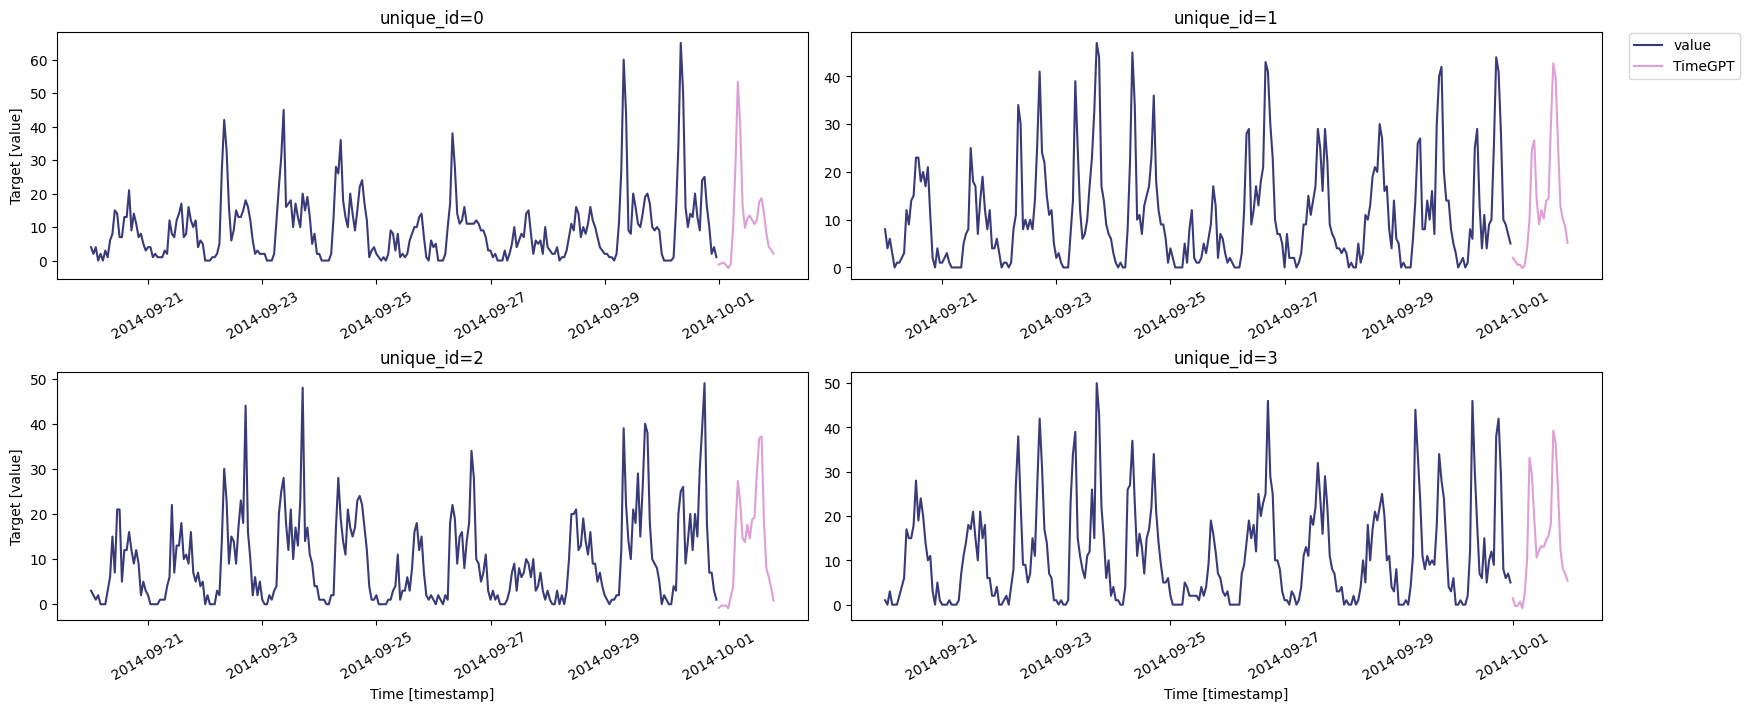

In [24]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='timestamp', target_col='value', max_insample_length=24*11)

##### Backtesting

In [25]:
def backtest_forecasting(df, start_timestamp, horizon):
    """
    Backtest a time forecasting model by iteratively making forecasts at fixed intervals.
    
    :param df: DataFrame with time series data (must contain 'timestamp' and 'value')
    :param start_timestamp: The timestamp from which to start the backtesting process
    :param horizon: Forecasting horizon (number of time steps to forecast at each iteration)
    
    :return: A DataFrame with concatenated forecasts
    """
    
    # Ensure timestamp is in datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    all_forecasts = []
    current_timestamp = start_timestamp

    print(f'current: {current_timestamp}')
    print(f'max: {df['timestamp'].max()}')
    
    while current_timestamp < df['timestamp'].max():
        # Filter the data up to the current timestamp

        print(f'current: {current_timestamp}')
        df_subset = df[df['timestamp'] <= current_timestamp]
        
        # Make a forecast using the model
        forecast_df = nixtla_client.forecast(df=df_subset, h=horizon, freq='h', time_col='timestamp', target_col='value')
        
        # Append the results
        all_forecasts.append(forecast_df)
        
        # Move to the next forecasting window
        current_timestamp += pd.Timedelta(hours=horizon)
    
    # Concatenate all forecasts into a single DataFrame
    return pd.concat(all_forecasts, ignore_index=True)

In [26]:
timegpt_fcst_df_backtest = backtest_forecasting(df, datetime(2014,9,21), 24)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


current: 2014-09-21 00:00:00
max: 2014-09-30 23:00:00
current: 2014-09-21 00:00:00


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


current: 2014-09-22 00:00:00


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


current: 2014-09-23 00:00:00


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


current: 2014-09-24 00:00:00


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


current: 2014-09-25 00:00:00


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


current: 2014-09-26 00:00:00


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


current: 2014-09-27 00:00:00


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


current: 2014-09-28 00:00:00


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


current: 2014-09-29 00:00:00


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


current: 2014-09-30 00:00:00


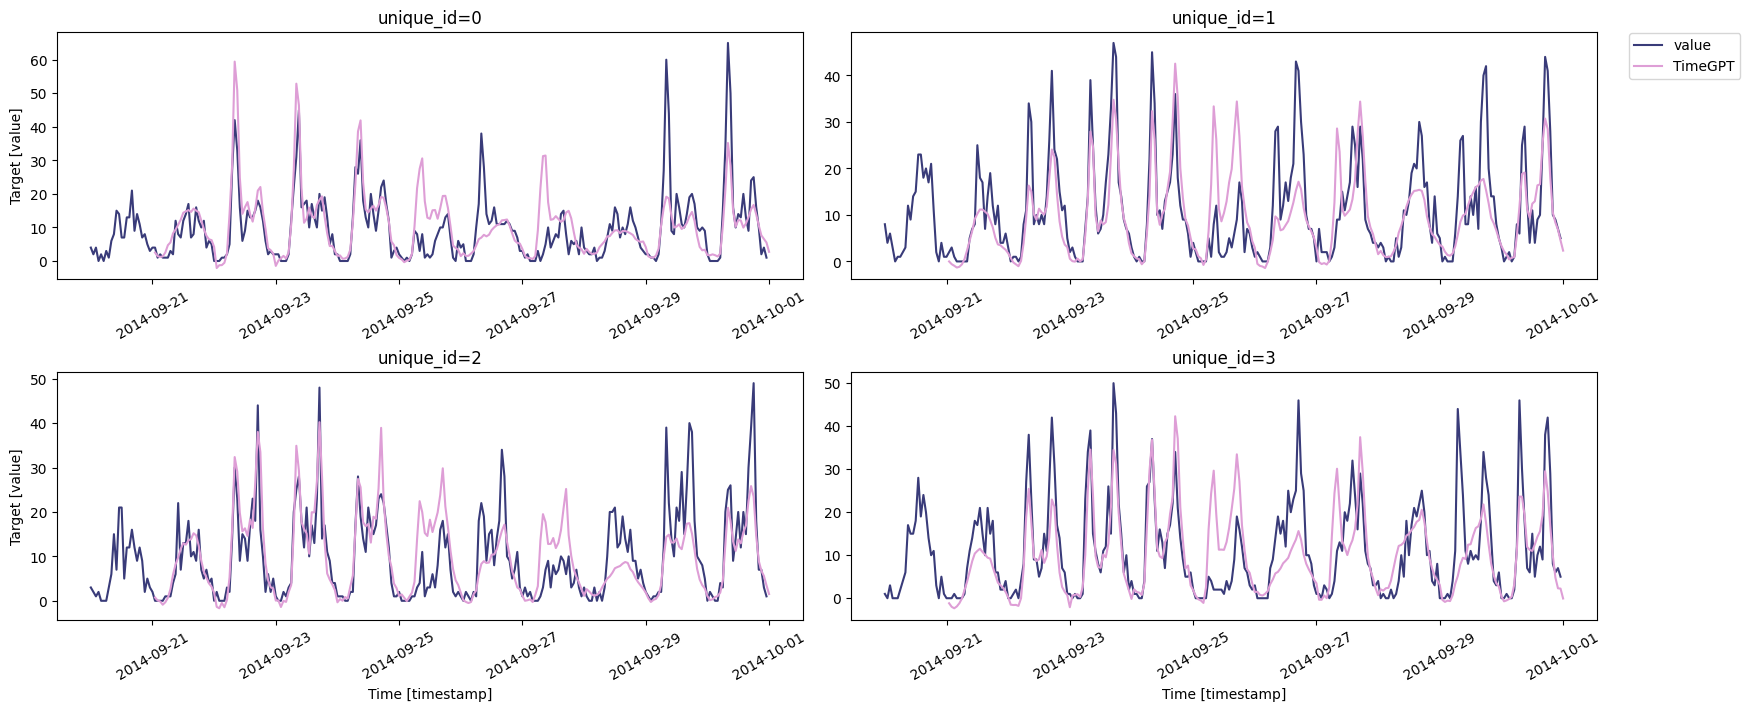

In [27]:
nixtla_client.plot(df, timegpt_fcst_df_backtest, time_col='timestamp', target_col='value', max_insample_length=24*11)

In [30]:
rmse = compute_rmse(df, timegpt_fcst_df_backtest)
rmse

               timestamp  value  unique_id_x  unique_id_y   TimeGPT
0    2014-09-21 01:00:00    4.0            0            0  2.516364
1    2014-09-21 01:00:00    4.0            0            1 -0.000597
2    2014-09-21 01:00:00    4.0            0            2  0.754800
3    2014-09-21 01:00:00    4.0            0            3 -1.170985
4    2014-09-21 02:00:00    1.0            0            0  1.462680
...                  ...    ...          ...          ...       ...
3819 2014-09-30 22:00:00    7.0            3            3  2.302446
3820 2014-09-30 23:00:00    5.0            3            0  5.505838
3821 2014-09-30 23:00:00    5.0            3            1  4.514214
3822 2014-09-30 23:00:00    5.0            3            2  3.481431
3823 2014-09-30 23:00:00    5.0            3            3  2.236673

[3824 rows x 5 columns]


np.float64(8.346675647024847)

In [31]:
timegpt_fcst_df_backtest = backtest_forecasting(df, datetime(2014,9,21), 48)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


current: 2014-09-21 00:00:00
max: 2014-09-30 23:00:00
current: 2014-09-21 00:00:00


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


current: 2014-09-23 00:00:00


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


current: 2014-09-25 00:00:00


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


current: 2014-09-27 00:00:00


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


current: 2014-09-29 00:00:00


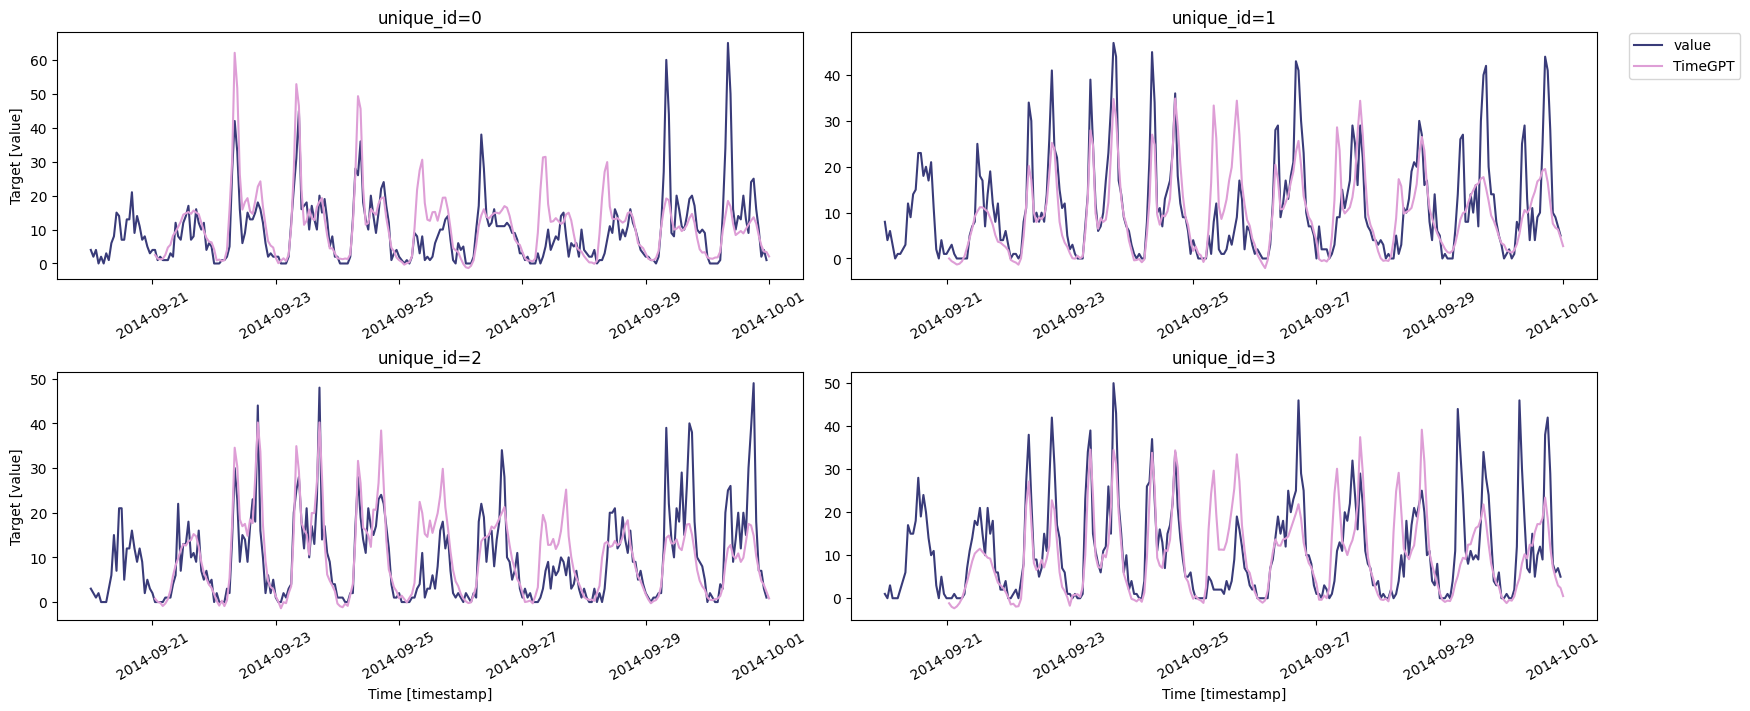

In [32]:
nixtla_client.plot(df, timegpt_fcst_df_backtest, time_col='timestamp', target_col='value', max_insample_length=24*11)

In [33]:
rmse = compute_rmse(df, timegpt_fcst_df_backtest)
rmse

               timestamp  value  unique_id_x  unique_id_y   TimeGPT
0    2014-09-21 01:00:00    4.0            0            0  2.516364
1    2014-09-21 01:00:00    4.0            0            1 -0.000597
2    2014-09-21 01:00:00    4.0            0            2  0.754800
3    2014-09-21 01:00:00    4.0            0            3 -1.170985
4    2014-09-21 02:00:00    1.0            0            0  1.462680
...                  ...    ...          ...          ...       ...
3819 2014-09-30 22:00:00    7.0            3            3  2.953221
3820 2014-09-30 23:00:00    5.0            3            0  3.396904
3821 2014-09-30 23:00:00    5.0            3            1  4.583953
3822 2014-09-30 23:00:00    5.0            3            2  2.344816
3823 2014-09-30 23:00:00    5.0            3            3  2.392262

[3824 rows x 5 columns]


np.float64(8.666202218206987)

##### All cells & backtesting

In [34]:
def compute_rmse(original_df, forecast_df):
    # Convert timestamp to datetime
    original_df['timestamp'] = pd.to_datetime(original_df['timestamp'])
    forecast_df['timestamp'] = pd.to_datetime(forecast_df['timestamp'])

    # Merge the DataFrames based on the timestamp
    merged_df = pd.merge(original_df, forecast_df, on=['timestamp','unique_id'], how='inner')
    print(merged_df)

    # Calculate the squared differences
    merged_df['squared_diff'] = (merged_df['value'] - merged_df['TimeGPT'])**2

    # Calculate RMSE
    rmse = np.sqrt(merged_df['squared_diff'].mean())
    return rmse


In [35]:
dfs = []
i=0

for channel in [0,1]:
    for row in range(0,16):
        for col in range(0,8):
            dfs.append(get_df(row,col,i,channel))
            i+=1

df = pd.concat(dfs, axis=0)
df

,timestamp,value,unique_id
0,2014-04-01 00:00,0.0,0
1,2014-04-01 01:00,0.0,0
2,2014-04-01 02:00,0.0,0
3,2014-04-01 03:00,0.0,0
4,2014-04-01 04:00,0.0,0
...,...,...,...
4387,2014-09-30 19:00,1.0,255
4388,2014-09-30 20:00,4.0,255
4389,2014-09-30 21:00,1.0,255
4390,2014-09-30 22:00,1.0,255


In [41]:
import os 

HORIZON = 1
path = f'predictions/timegpt/fcst_c01_h{HORIZON}.csv'

if os.path.isfile(path):
    timegpt_fcst_df_backtest = pd.read_csv(path)
else: 
    timegpt_fcst_df_backtest = backtest_forecasting(df, datetime(2014,9,21), HORIZON)
    timegpt_fcst_df_backtest.to_csv(path, index=False)

rmse = compute_rmse(df, timegpt_fcst_df_backtest)
print(f'horizon={HORIZON}: rmse={rmse}')

                timestamp  value  unique_id   TimeGPT
0     2014-09-21 01:00:00    0.0          0  0.003328
1     2014-09-21 02:00:00    0.0          0  0.003328
2     2014-09-21 03:00:00    0.0          0  0.003328
3     2014-09-21 04:00:00    0.0          0  0.003328
4     2014-09-21 05:00:00    0.0          0  0.003328
...                   ...    ...        ...       ...
61179 2014-09-30 19:00:00    1.0        255  3.210955
61180 2014-09-30 20:00:00    4.0        255  1.871202
61181 2014-09-30 21:00:00    1.0        255  2.555601
61182 2014-09-30 22:00:00    1.0        255  0.832277
61183 2014-09-30 23:00:00    2.0        255  0.272251

[61184 rows x 4 columns]
horizon=1: rmse=5.695230340297138


* horizon=1: rmse=5.695230340297138
* horizon=12: rmse=7.623156119092268
* horizon=24: rmse=8.931978485071902

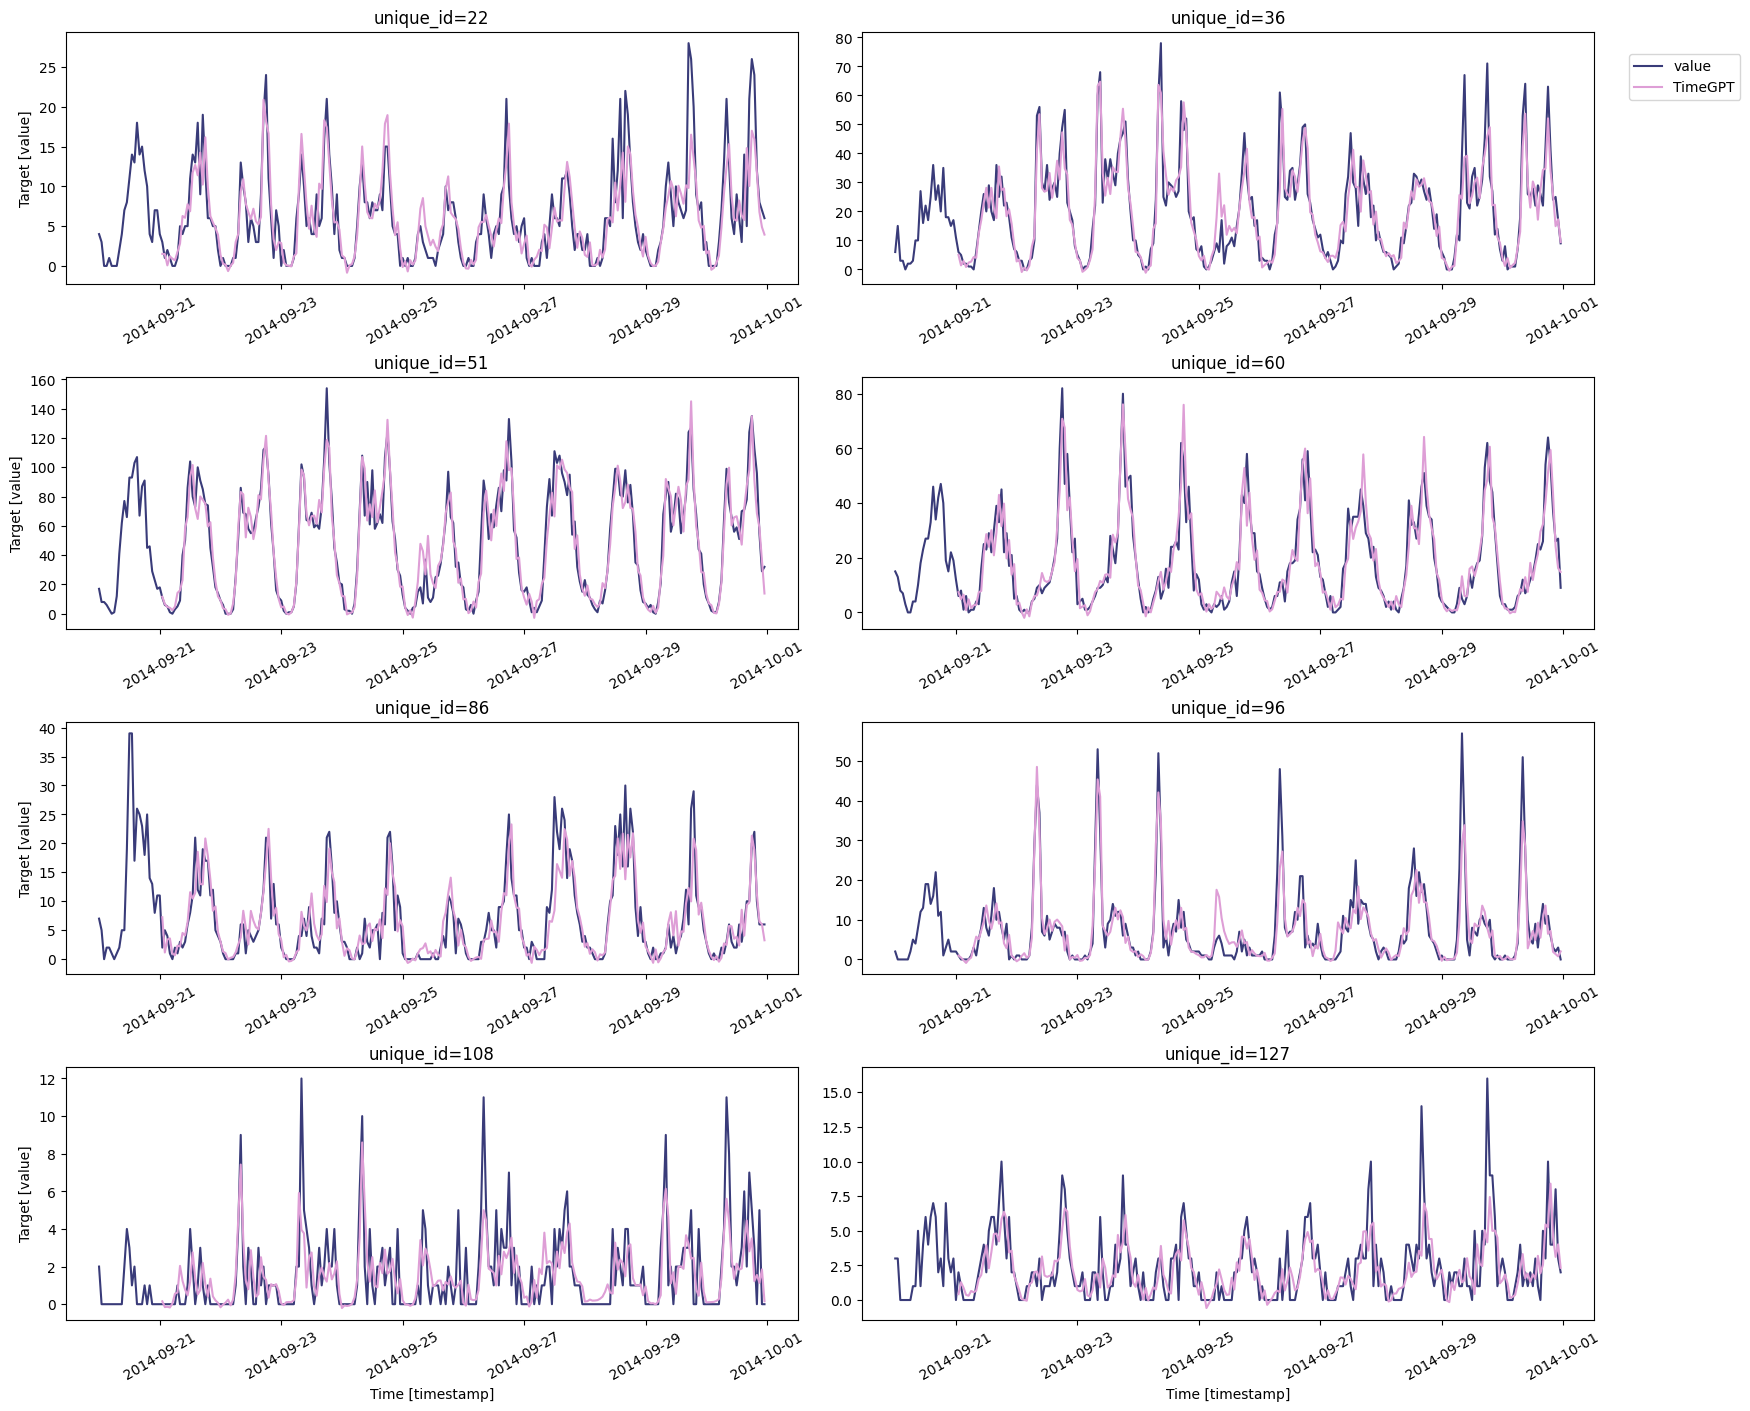

In [42]:
nixtla_client.plot(df, timegpt_fcst_df_backtest, time_col='timestamp', target_col='value', max_insample_length=24*11, unique_ids=[22,36,51,60,86,96,108,127])

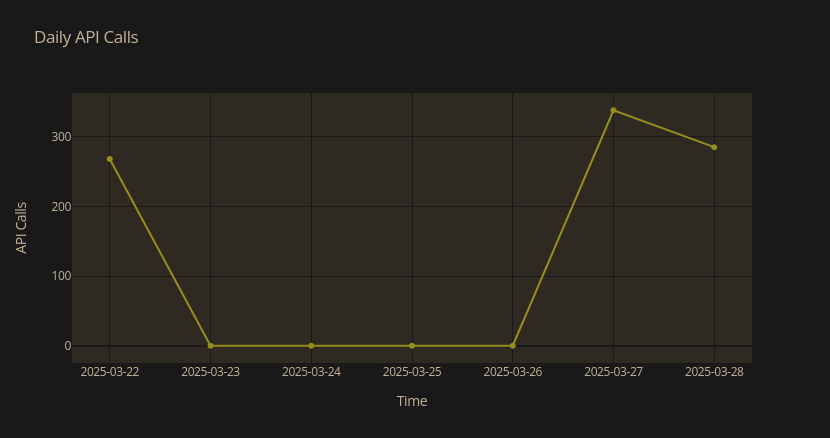

### Results


Extended Table 3: Comparisons with baselines on BikeNYC. The results of ARIMA, SARIMA, VAR, and 4 DeepST variants are taken from (Zhang et al. 2016). ST-ResNet results are taken from (Zhang et al. 2017).

| Model                             | RMSE  |
|-----------------------------------|-------|
| ARIMA                             | 10.56 |
| SARIMA                            | 10.07 |
| VAR                               | 9.92  |
| DeepST-C                          | 8.39  |
| DeepST-CP                         | 7.64  |
| DeepST-CPT                        | 7.56  |
| DeepST-CPTM                       | 7.43  |
| ST-ResNet                         | 6.33 |
| **TimeGPT (horizon=1)**              | **5.70**  |
| TimeGPT (horizon=12)              | 7.62  |
| TimeGPT (horizon=24)              | 8.93  |

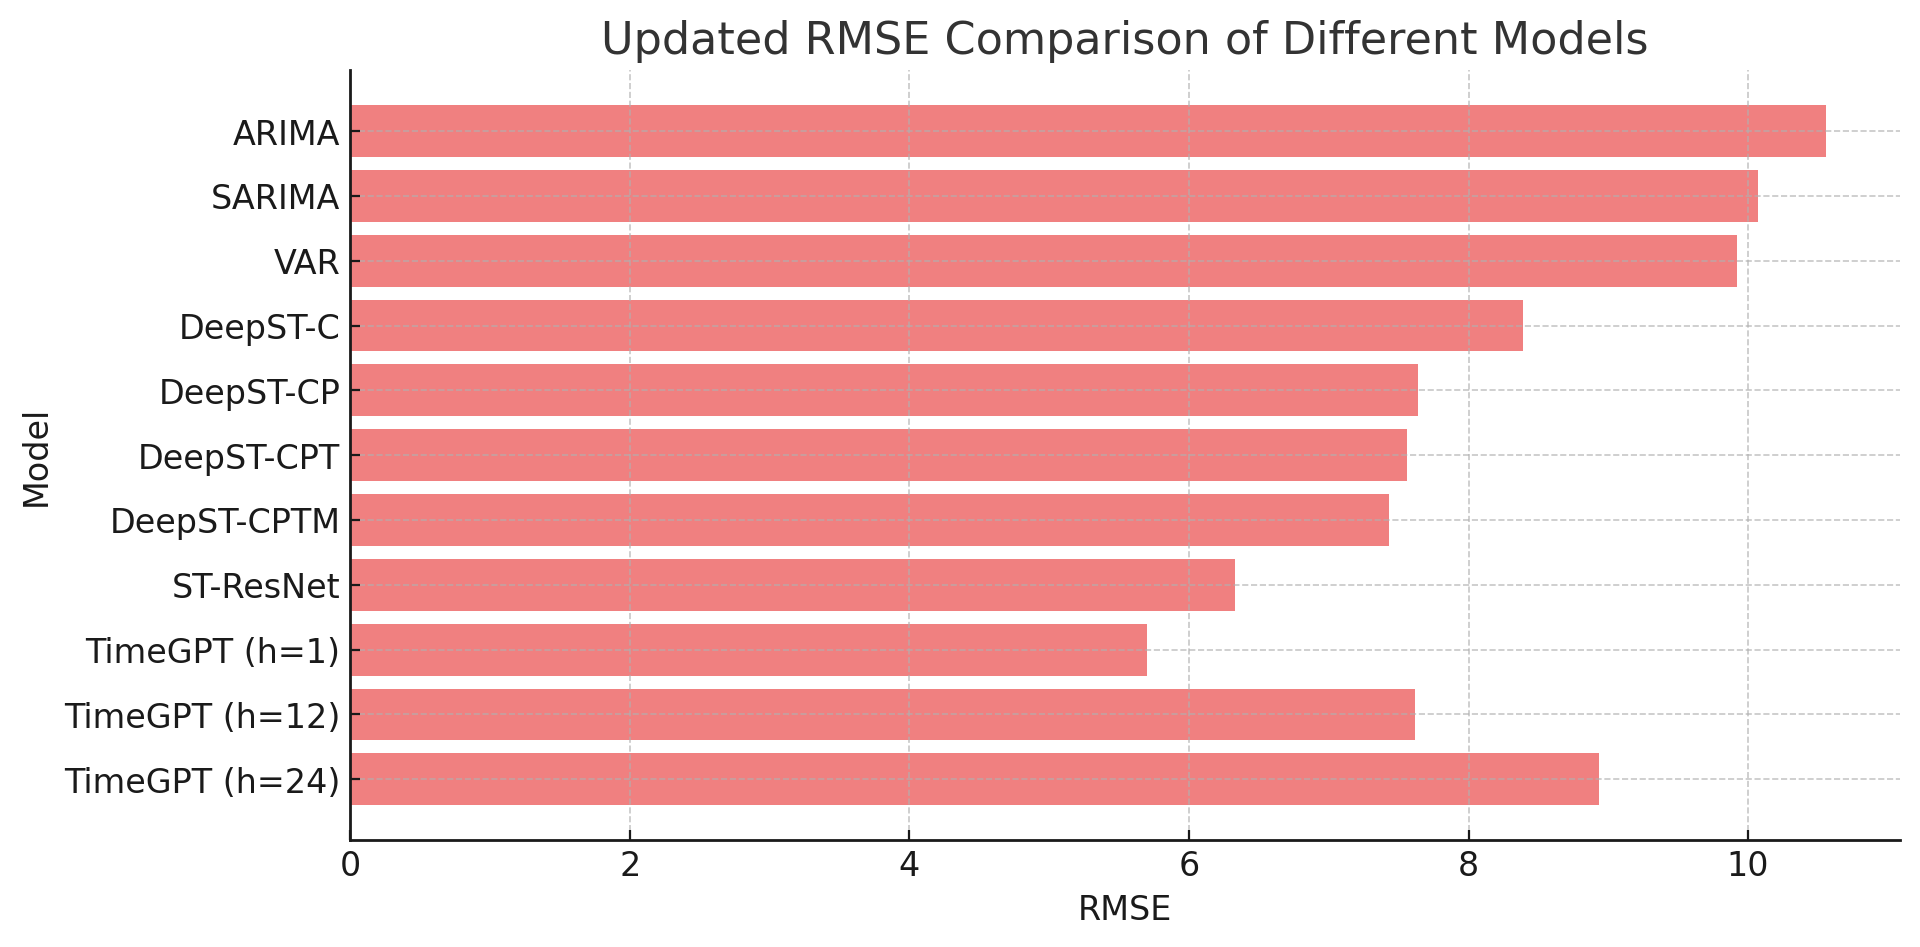

### Conclusion

Since the BikeNYC dataset has been public for a long time, we must assume that it may have been used to train TimeGPT. This means that the foundation model has seen the solution before. (Similar to how ChatGPT performs well on some standardized tests because the tests incl answers are in its training set.)

# Remarks 

## Earlier paper by Zhang et al. (2016) "DNN-Based Prediction Model for Spatio-Temporal Data"

https://www.microsoft.com/en-us/research/wp-content/uploads/2016/09/DeepST-SIGSPATIAL2016_Zheng-2.pdf

### Multi-step forcasting (i.e. longer forecasting horizon)

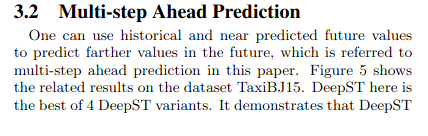
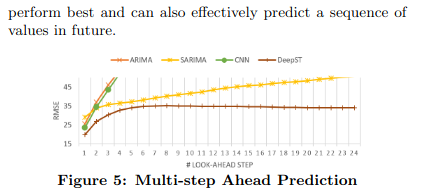

### More data is better ;-)

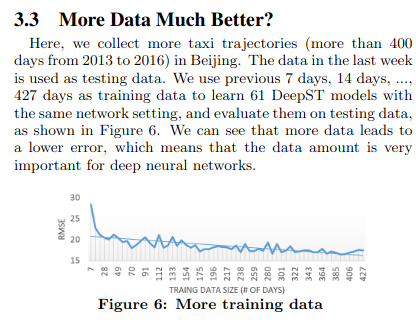

### Potential error in RMSE reporting

The RMSE values of ARIMA and SARIMA for BikeNYC appear switched in Zhang et al. 2016 and 2017, respectively:

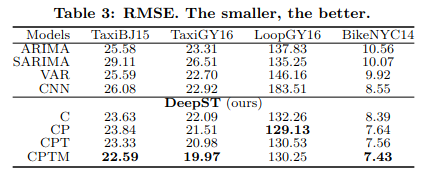